# Red Neuronal Básica
（￣︶￣）↗　autor: 😺[@fuhrerhlemon](https://github.com/Fuhrerh-Lemon)

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.datasets import make_circles

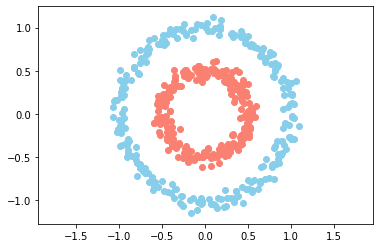

In [2]:
# Creando DataSet

n = 500
p = 2

X , Y = make_circles(n_samples=n, factor = 0.5,noise=0.05)
Y = Y[:,np.newaxis]


plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='skyblue')
plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')
plt.axis('equal')
plt.show()

In [ ]:
# Clase de la capa Neuronal
class NeuralLayer():

    def __init__(self, n_conn, n_neur, act_f):
        self.act_f = act_f

        self.b = np.random.rand(1,n_neur) * 2 - 1
        self.W = np.random.rand(n_conn,n_neur) * 2 - 1

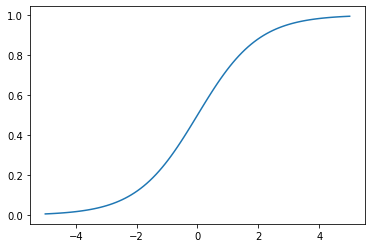

In [4]:
# Activando las funciones necesarias

sigm = (lambda x: 1 / (1 + np.e ** (-x)),lambda x: x * (1 - x))

relu = lambda x: np.maximum(0,x)

_x = np.linspace(-5,5,100)
plt.plot(_x, sigm[0](_x))

In [ ]:
# Función de la arquitectura
def create_nn(topology, act_f):
    nn = []
    for l, layer in enumerate(topology[:-1]):
        nn.append(NeuralLayer(topology[l],topology[l+1], act_f))  
    return nn

In [ ]:
# Función de perdida
l2_cost = (lambda Yp, Yr: np.mean((Yp-Yr)**2),lambda Yp,Yr: (Yp-Yr))

In [ ]:
def pass_n(neural_net, X, Y, l2_cost, lr=0.5, train=True):

    out = [(None, X)]

  # Forward Pass
    for l, layer in enumerate(neural_net):

    z = out[-1][1] @ neural_net[l].W + neural_net[l].b
    a = neural_net[l].act_f[0](z)

    out.append((z,a))

    if train:

    # Backward Pass
        deltas = []

        for l in reversed(range(0,len(neural_net))):
      
            z = out[l+1][0]
            a = out[l+1][1]

            if l == len(neural_net) -1 :
                deltas.insert(0,l2_cost[1](a,Y)*neural_net[l].act_f[1](a))
            else:
                deltas.insert(0,deltas[0] @ _W.T *neural_net[l].act_f[1](a))

            _W = neural_net[l].W

            # Gradiente de descenso
            neural_net[l].b = neural_net[l].b - np.mean(deltas[0], axis = 0, keepdims=True)*True
            neural_net[l].W = neural_net[l].W - out[l][1].T @ deltas[0] * lr
    
    return out[-1][1]     

In [ ]:
epoch = 1000

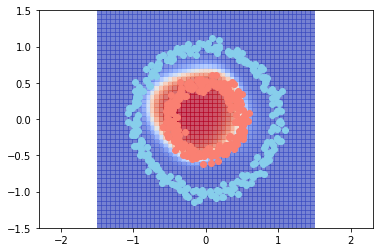

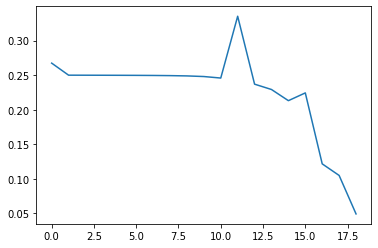

In [9]:
import time
from IPython.display import clear_output

topology = [p, 4, 8, 4, 1] #Red Neuronal, arquitectura

neuralnet= create_nn(topology,sigm)

loss = []

# loop de entrenamiento
for i in range(epoch):
  
    pY = pass_n(neuralnet, X, Y, l2_cost, lr=0.06,train= True)

    if i%25 == 0:
    
        loss.append(l2_cost[0](pY, Y))
    
        res = 50

        _x0 = np.linspace(-1.5,1.5,res)
        _x1 = np.linspace(-1.5,1.5,res)

        _Y = np.zeros((res,res))

        for i0, x0 in enumerate(_x0):
            for i1, x1 in enumerate(_x1):
                _Y[i0,i1] = pass_n(neuralnet, np.array([[x0,x1]]), Y, l2_cost,train= False)[0][0]
    
    plt.pcolormesh(_x0, _x1, _Y, cmap="coolwarm",alpha=0.7)
    plt.axis("equal")

    plt.scatter(X[Y[:,0]==0,0],X[Y[:,0]==0,1],c='skyblue')
    plt.scatter(X[Y[:,0]==1,0],X[Y[:,0]==1,1],c='salmon')

    clear_output(wait=True)
    plt.show()
    plt.plot(range(len(loss)),loss)
    plt.show()
    time.sleep(0.1)

    if loss[-1]< 0.05:
        break